### Le chemin de nos données

In [1]:
path = "./data/"

### Les constantes

In [2]:
IMAGE_SIZE = 128
NUM_CLASSES = 3
BATCH_SIZE = 32
EPOCHS = 50

### Les importations

In [3]:
import os
# Les librairies de manipulation de données
import numpy as np
import matplotlib.pyplot as plt
# Les librairies de manipulation d'image
from PIL import Image
# Les fontions définies
from outils.analysis import plot_training_analysis
from outils.load_data import load_data
# Les fonctions de keras
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D

### Fonctions Utiles

In [ ]:
def matrice_confusion(model, test_data, test_labels):
    predictions = model.predict(test_data)
    predictions = np.argmax(predictions, axis=1)
    labels = np.argmax(test_labels, axis=1)
    matrice = np.zeros((NUM_CLASSES, NUM_CLASSES))
    for i in range(len(predictions)):
        matrice[labels[i]][predictions[i]] += 1
    return matrice

### Chargement des données

In [4]:
labels = ['angry','happiness','crying']

x_train, y_train = load_data(path, labels, dataset='train', image_size=IMAGE_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=IMAGE_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=IMAGE_SIZE)
print(x_test.shape, y_test.shape)

(448, 128, 128, 3) (448, 1)
(240, 128, 128, 3) (240, 1)
(271, 128, 128, 3) (271, 1)


In [5]:
# Normalisation des données
x_train_normal = x_train/255
y_train_normal = y_train/255

x_val_normal = x_val/255
y_val_normal = y_val/255

x_test_normal = x_test/255
y_test_normal = y_test/255

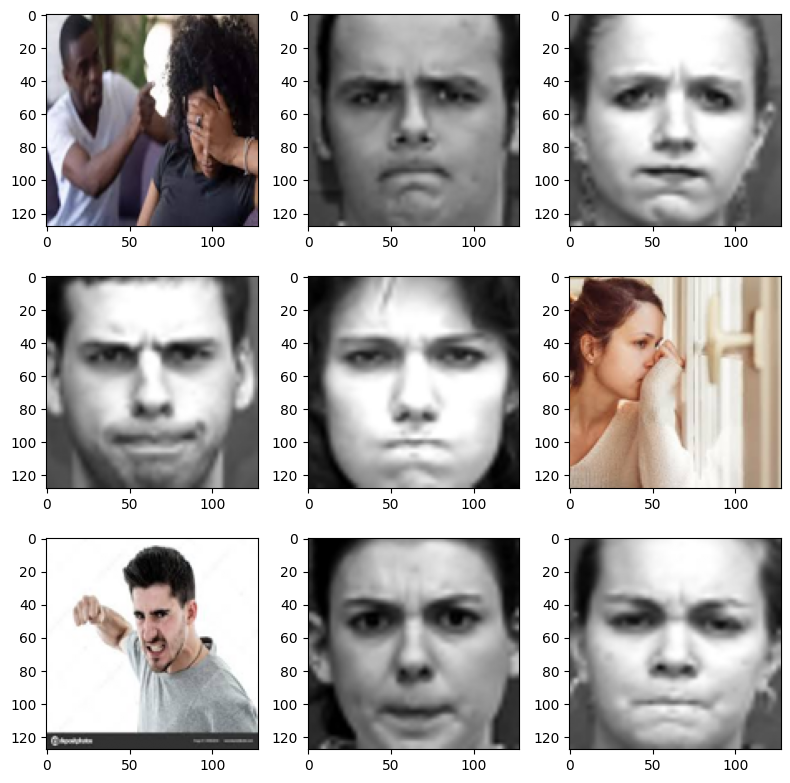

In [6]:
indices = np.arange(x_train_normal.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(8, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train_normal[i])
plt.tight_layout()
plt.show()

### Générer plus de données

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

gen_data = train_datagen.flow(x_train, y_train, BATCH_SIZE)

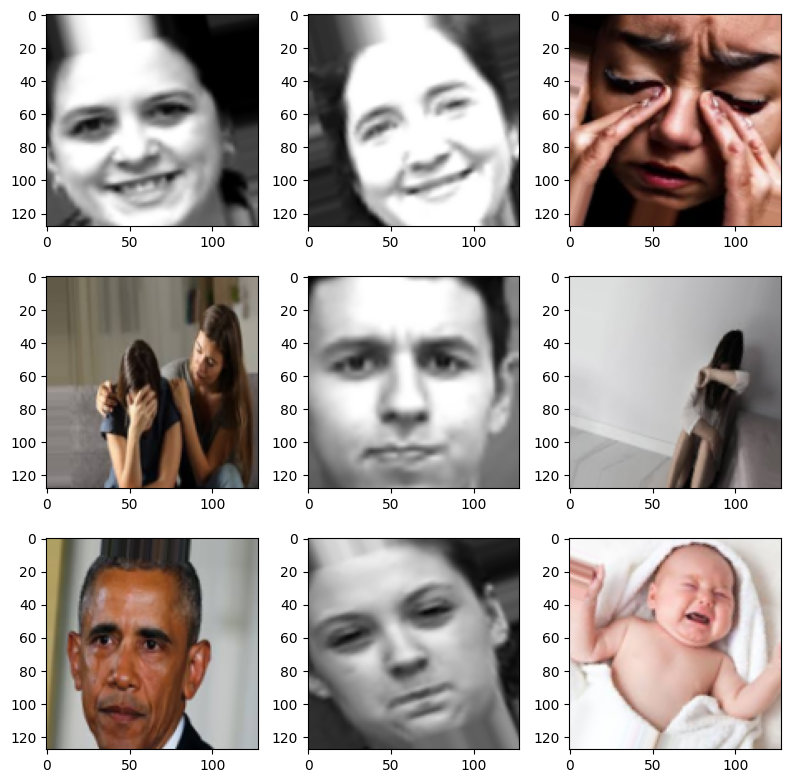

In [9]:
x_gen, y_gen = next(gen_data)
x_gen, y_gen = x_gen/255, y_gen/255
indices = np.arange(x_gen.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(8, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_gen[i])
plt.tight_layout()
plt.show()

### Modèle simple

In [10]:
# Définition du modèle
model_simple = Sequential()
    
model_simple.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model_simple.add(MaxPooling2D((2, 2)))
    
model_simple.add(Conv2D(64, (3, 3), activation='relu'))
model_simple.add(MaxPooling2D((2, 2)))
    
model_simple.add(Conv2D(96, (3, 3), activation='relu'))
model_simple.add(MaxPooling2D((2, 2)))
    
model_simple.add(Conv2D(128, (3, 3), activation='relu'))
model_simple.add(MaxPooling2D((2, 2)))
    
model_simple.add(Flatten())

model_simple.add(Dense(512, activation='relu')) 
model_simple.add(Dense(NUM_CLASSES, activation="softmax"))  # 6 classes d'émotions différentes

C:\Users\offic\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compiler le modèle
model_simple.summary()
model_simple.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=3e-4), metrics=['sparse_categorical_accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,546,851 (9.72 MB)

 Trainable params: 2,546,851 (9.72 MB)

 Non-trainable params: 0 (0.00 B)

##### Entrainer le modèle

In [13]:
# Entraînement du modèle
history_simple = model_simple.fit(gen_data, validation_data=(x_val, y_val), epochs=EPOCHS)

Epoch 1/50


C:\Users\offic\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 36.9459 - sparse_categorical_accuracy: 0.3906 - val_loss: 1.8122 - val_sparse_categorical_accuracy: 0.4000
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 1.4040 - sparse_categorical_accuracy: 0.4831 - val_loss: 1.3817 - val_sparse_categorical_accuracy: 0.4458
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.8746 - sparse_categorical_accuracy: 0.6359 - val_loss: 1.2824 - val_sparse_categorical_accuracy: 0.4333
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 0.7799 - sparse_categorical_accuracy: 0.6426 - val_loss: 1.2902 - val_sparse_categorical_accuracy: 0.4458
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.7565 - sparse_categorical_accuracy: 0.6852 - val_loss: 1.5209 - val_sparse_categorical_accuracy: 0.4375
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.6675 - sparse_categorical_accuracy: 0.7151 - val_loss: 1.5182 - val_sparse_categorical_accuracy: 0.4667
Epoch 7/50
14/

KeyboardInterrupt: 

##### Analyser les résultats

In [ ]:
# Affichage les courbes
plot_training_analysis(history_simple)

KeyError: 'accuracy'

### Modèle VGG16

In [ ]:
# Définition du modèle VGG19
# Charger le modèle VGG19 pré-entraîné avec les poids du jeu de données ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) 

model_vgg19 = Sequential()

# Ajouter le modèle VGG16
model_vgg19.add(Dense(256, activation='relu', input_dim=2*2*512))
model_vgg19.add(Dense(NUM_CLASSES, activation="softmax"))  # 6 classes d'émotions différentes

model_vgg19.compile(optimizer=optimizers.Adam(learning_rate=3e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\offic\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Le modèle simple
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

##### Entrainer le modèle

In [ ]:
# Chargement du modèle VGG16 et de ses caractéristiques
x_vgg19_train = base_model.predict(x_train)
x_vgg19_train = np.reshape(x_vgg19_train, (x_vgg19_train.shape[0], 2*2*512))

x_vgg19_val = base_model.predict(x_val)
x_vgg19_val = np.reshape(x_vgg19_val, (x_vgg19_val.shape[0], 2*2*512))

# Entraînement du modèle
history_vgg19 = model_vgg19.fit(x_vgg19_train, y_train, validation_data=(x_vgg19_val, y_val), epochs=EPOCHS)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2773 - loss: 11.6179 - val_accuracy: 0.2762 - val_loss: 10.6979
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5863 - loss: 3.0204 - val_accuracy: 0.2762 - val_loss: 10.7805
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 1.1545 - val_accuracy: 0.3018 - val_loss: 10.1220
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8420 - loss: 0.6647 - val_accuracy: 0.3274 - val_loss: 10.2683
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8737 - loss: 0.5844 - val_accuracy: 0.3299 - val_loss: 10.1420
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.4139 - val_accuracy: 0.3325 - val_loss: 10.2764
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9094 - loss: 0.4622 - val_accuracy: 0.3325 - val_loss: 10.3708
Epoch 8/50
26/26 ━━━━━━━━━━

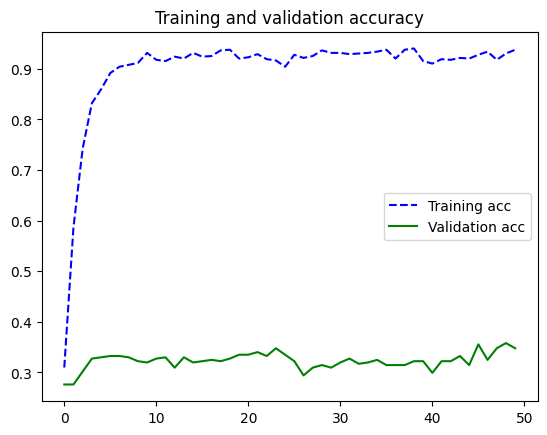

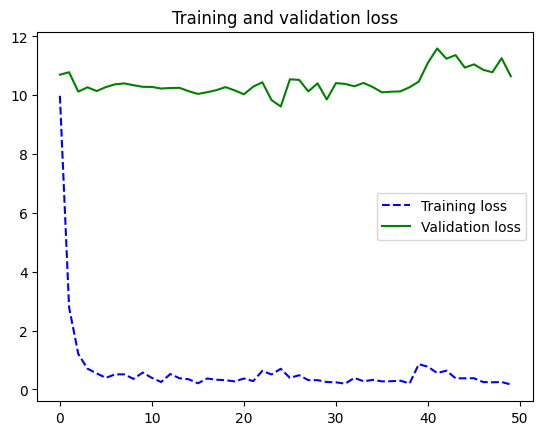

In [ ]:
# Affichage les courbes
plot_training_analysis(history_vgg19)